In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gc
from utils.methods import *
import warnings
warnings.filterwarnings('ignore')

This table consists of the monthly data related to any or multiple Credit Cards that the applicant had with the Home Credit Group. The table contains fields like balance, the credit limit, amount of drawings, etc. for each month of the credit card.

In [2]:
credit = pd.read_csv('../../Dataset/dseb63_final_project_DP_dataset/dseb63_credit_card_balance.csv')
credit

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,...,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,...,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,...,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,...,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,...,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227960,1551072,-1,0.000,202500,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,259579
3227961,2339982,-1,0.000,45000,0.0,0.0,0.0,0.0,0.0,NaN,...,0.000,0.0,0,0.0,0.0,0.0,Active,0,0,220697
3227962,2720102,-1,0.000,225000,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,93573
3227963,1897864,-2,0.000,270000,NaN,0.0,NaN,NaN,0.0,NaN,...,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,11072


In [3]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227965 entries, 0 to 3227964
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   MONTHS_BALANCE              int64  
 2   AMT_BALANCE                 float64
 3   AMT_CREDIT_LIMIT_ACTUAL     int64  
 4   AMT_DRAWINGS_ATM_CURRENT    float64
 5   AMT_DRAWINGS_CURRENT        float64
 6   AMT_DRAWINGS_OTHER_CURRENT  float64
 7   AMT_DRAWINGS_POS_CURRENT    float64
 8   AMT_INST_MIN_REGULARITY     float64
 9   AMT_PAYMENT_CURRENT         float64
 10  AMT_PAYMENT_TOTAL_CURRENT   float64
 11  AMT_RECEIVABLE_PRINCIPAL    float64
 12  AMT_RECIVABLE               float64
 13  AMT_TOTAL_RECEIVABLE        float64
 14  CNT_DRAWINGS_ATM_CURRENT    float64
 15  CNT_DRAWINGS_CURRENT        int64  
 16  CNT_DRAWINGS_OTHER_CURRENT  float64
 17  CNT_DRAWINGS_POS_CURRENT    float64
 18  CNT_INSTALMENT_MATURE_CUM   float64
 19  NAME_CONTRACT_STATUS 

In [4]:
credit.duplicated().sum()

0

In [5]:
credit.nunique().sum()

5637244

In [6]:
credit.isnull().sum()

SK_ID_PREV                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      605754
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    605754
AMT_DRAWINGS_POS_CURRENT      605754
AMT_INST_MIN_REGULARITY       264384
AMT_PAYMENT_CURRENT           620093
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      605754
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    605754
CNT_DRAWINGS_POS_CURRENT      605754
CNT_INSTALMENT_MATURE_CUM     264384
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
SK_ID_CURR                         0
dtype: int64

<Axes: xlabel='Percentage', ylabel='Feature'>

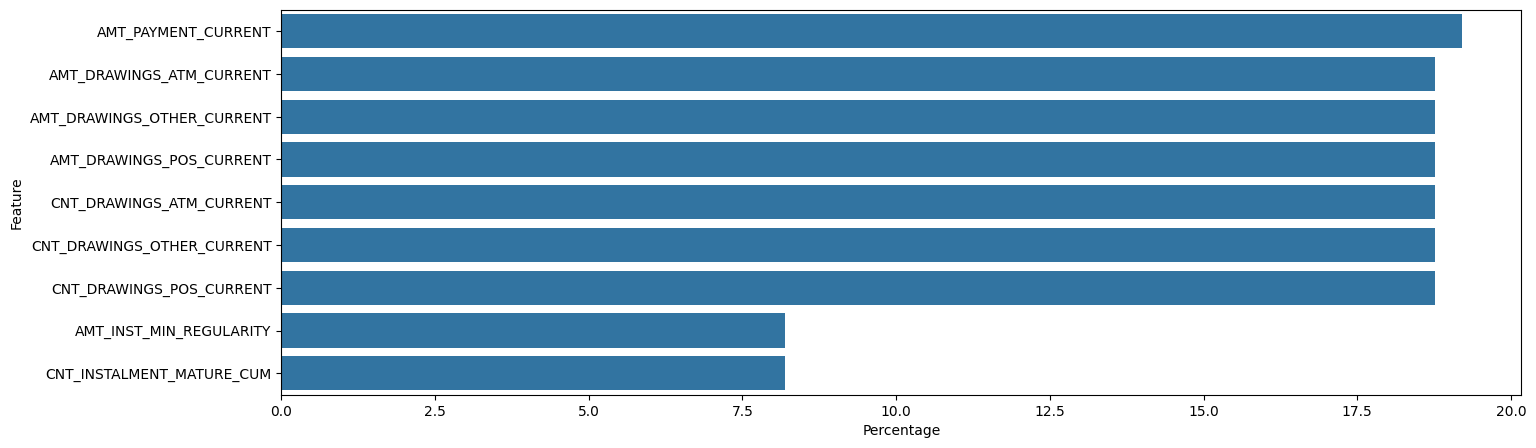

In [7]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(credit)
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

- Out of the 23 features, 9 of these features contain some NaN values.
- If we look at the percentages of NaN values, they are considerably lower than the rest of the tables we have seen so far.
- 7 of these features have close to 20% NaN values. These features are mostly related to the Amounts of Drawing and Counts of Drawings. Other two of the features are related to the installments statistics.

In [8]:
train = pd.read_csv('../../Dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv')

In [9]:
# Merge application train with credit_card_balance
train_copy = train[['TARGET', 'SK_ID_CURR']]
cc = pd.merge(train_copy, credit, on='SK_ID_CURR')
cc.head()

,TARGET,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,139008,1489396,-2,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1,0,139008,1489396,-1,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2,0,139008,1489396,-5,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3,0,139008,1489396,-3,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
4,0,139008,1489396,-4,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [12]:
# Perform one-hot encoding for categorical columns if needed
cc = pd.get_dummies(cc, dummy_na=False)

# Rename columns
cc.rename(columns={'AMT_RECIVABLE': 'AMT_RECEIVABLE'}, inplace=True)

# Calculate new features
cc['LIMIT_USE'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
cc['PAYMENT_DIV_MIN'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']
cc['LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']

# Calculate additional features
cc['AMT_DRAWING_SUM'] = cc[['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 
                            'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT']].sum(axis=1)
cc['BALANCE_LIMIT_RATIO'] = cc['AMT_BALANCE'] / (cc['AMT_CREDIT_LIMIT_ACTUAL'] + 0.00001)
cc['CNT_DRAWING_SUM'] = cc[['CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 
                             'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 
                             'CNT_INSTALMENT_MATURE_CUM']].sum(axis=1)
cc['MIN_PAYMENT_RATIO'] = cc['AMT_PAYMENT_CURRENT'] / (cc['AMT_INST_MIN_REGULARITY'] + 0.0001)
cc['PAYMENT_MIN_DIFF'] = cc['AMT_PAYMENT_CURRENT'] - cc['AMT_INST_MIN_REGULARITY']
cc['MIN_PAYMENT_TOTAL_RATIO'] = cc['AMT_PAYMENT_TOTAL_CURRENT'] / (cc['AMT_INST_MIN_REGULARITY'] + 0.00001)
cc['AMT_INTEREST_RECEIVABLE'] = cc['AMT_TOTAL_RECEIVABLE'] - cc['AMT_RECEIVABLE_PRINCIPAL']
cc['SK_DPD_RATIO'] = cc['SK_DPD'] / (cc['SK_DPD_DEF'] + 0.00001)

In [13]:
cc_non_default = cc[cc['TARGET']==0]
cc_default = cc[cc['TARGET']==1]

In [14]:
visualize = BivariateAnalysis()

Default Risk index group: "SK_DPD", "SK_DPD_DEF"

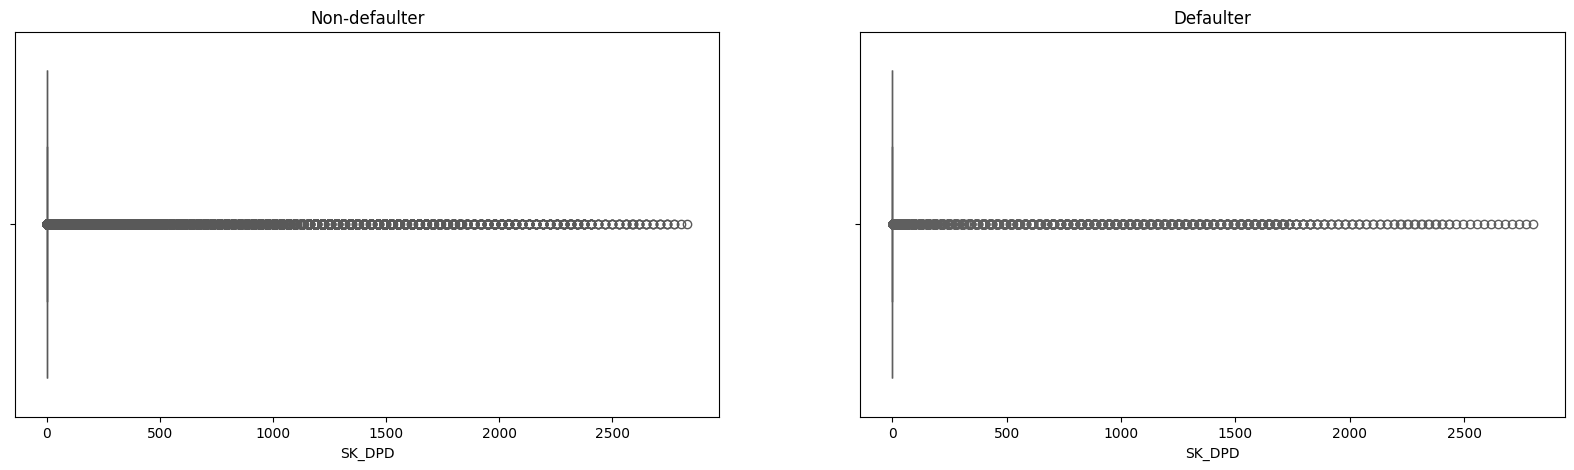

In [15]:
visualize.box_plot2(x='SK_DPD', df1= cc_non_default, df2= cc_default, width= 20, height=5)

The Non-default group tends to extend the overdue repayment period [0, 1000] more than the default group [0, 250].

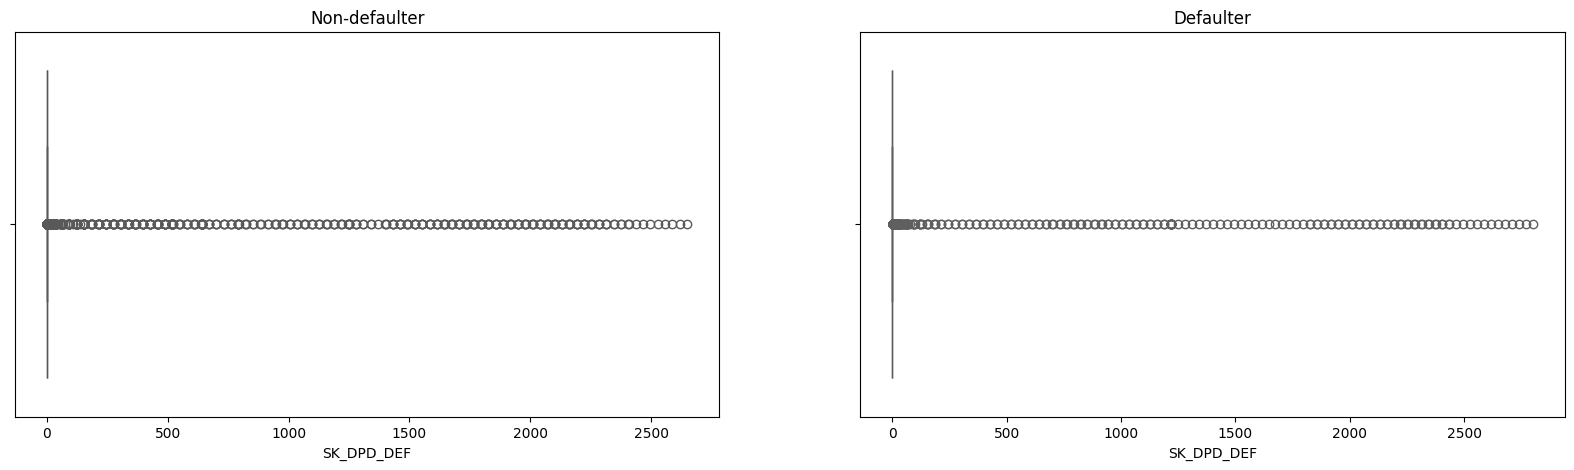

In [16]:
visualize.box_plot2(x='SK_DPD_DEF', df1= cc_non_default, df2= cc_default, width= 20, height=5)

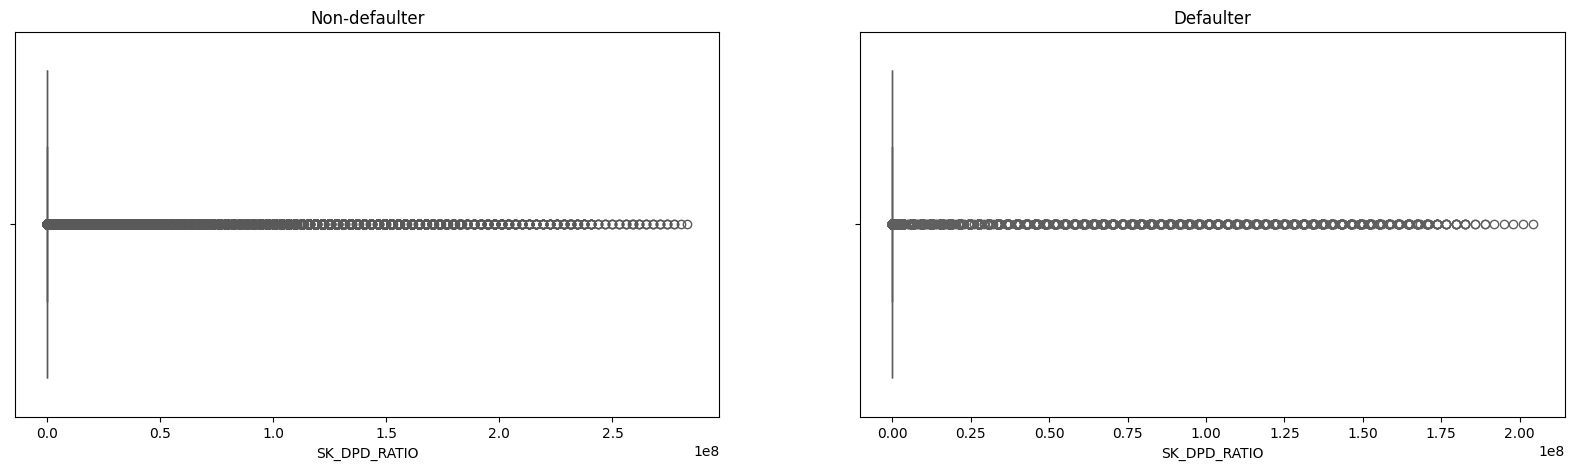

In [17]:
visualize.box_plot2(x='SK_DPD_RATIO', df1= cc_non_default, df2= cc_default, width= 20, height=5)

If we use the coefficient of days overdue for all loans / days overdue for large loans, the non-default group [0, 1.25] has a wider scaling coefficient than the default group [0, 0.5].

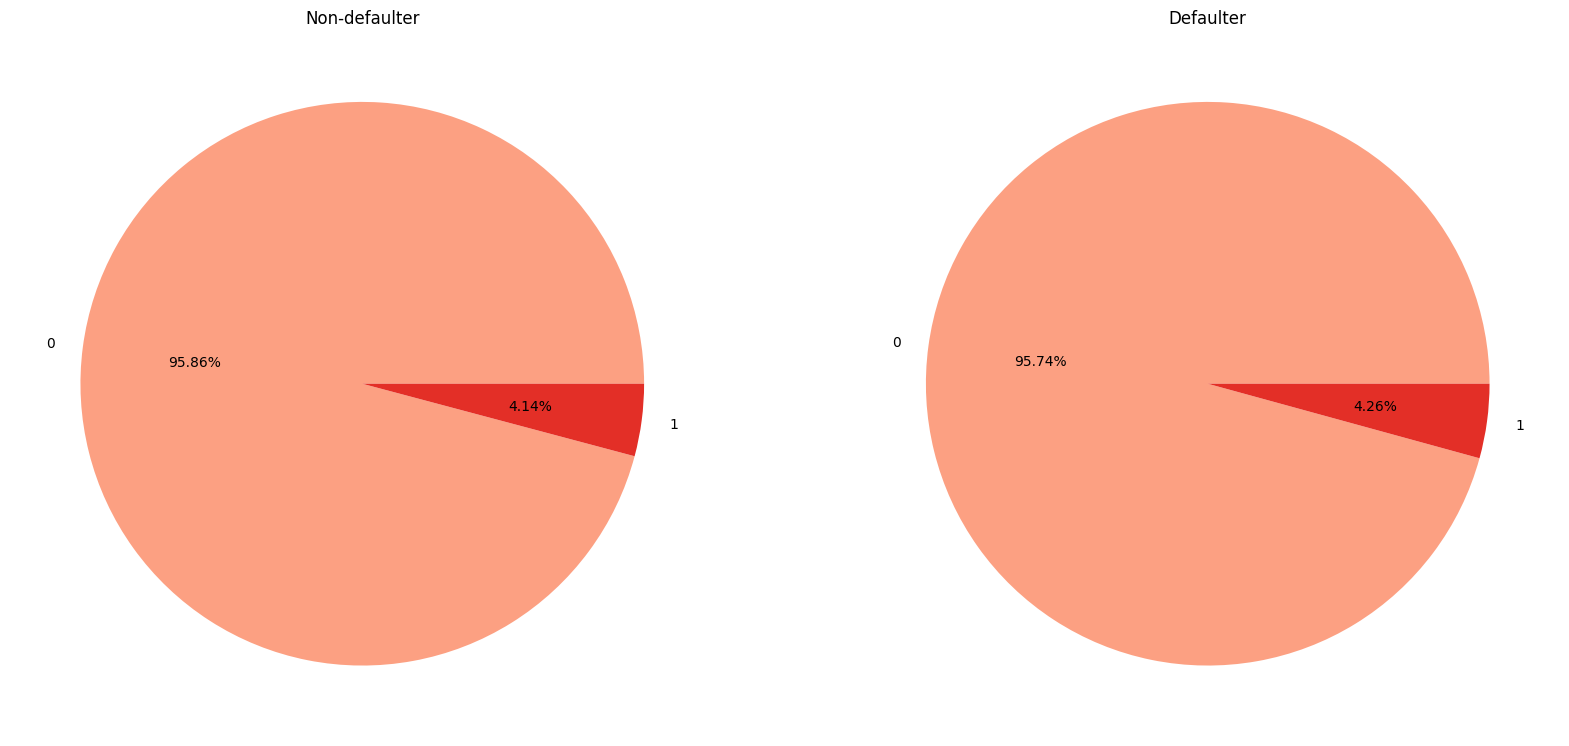

In [18]:
visualize.pie_plot(x='LATE_PAYMENT', df1=cc_non_default, df2=cc_default, width=20, height = 10)

Interest Earning index group: "AMT_RECEIVABLE_PRINCIPAL", "AMT_RECIVABLE", "AMT_TOTAL_RECEIVABLE"

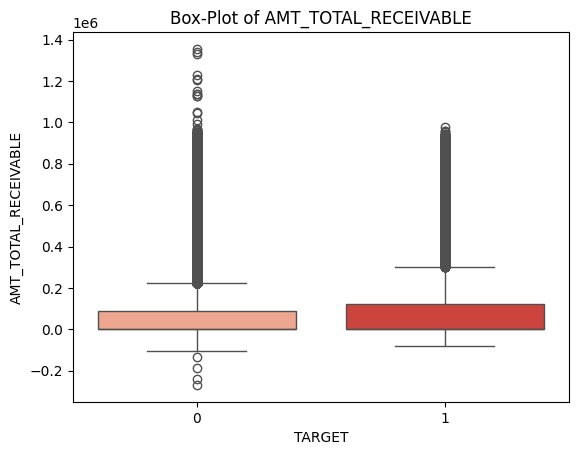

In [19]:
visualize.box_plot(y='AMT_TOTAL_RECEIVABLE', data_to_plot=cc)

The interquartile range of the non-default group is smaller than that of the default group.

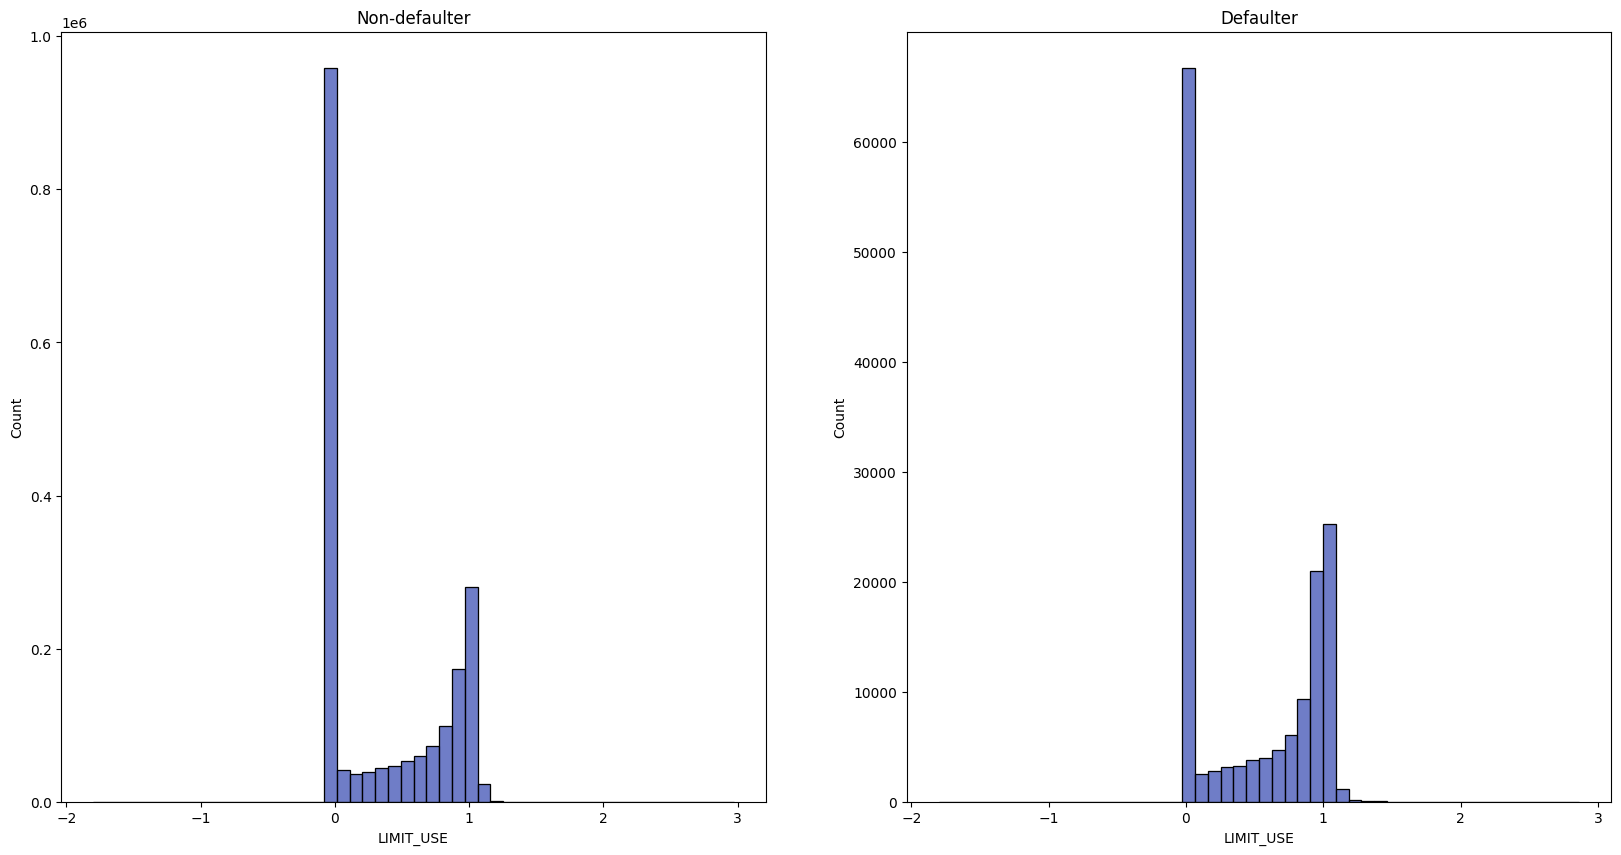

In [20]:
# Scale outliners:
limit_use_non_default = cc_non_default[(cc_non_default['LIMIT_USE'] >= -2) & (cc_non_default['LIMIT_USE'] <= 3) ]
limit_use_default = cc_default[(cc_default['LIMIT_USE'] >= -2) & (cc_default['LIMIT_USE'] <= 5)]
visualize.hist_plot(x='LIMIT_USE', df1=limit_use_non_default, df2=limit_use_default, width= 20, height=10, bins= 50)

The distribution of credit limit across the two groups is relatively similar.

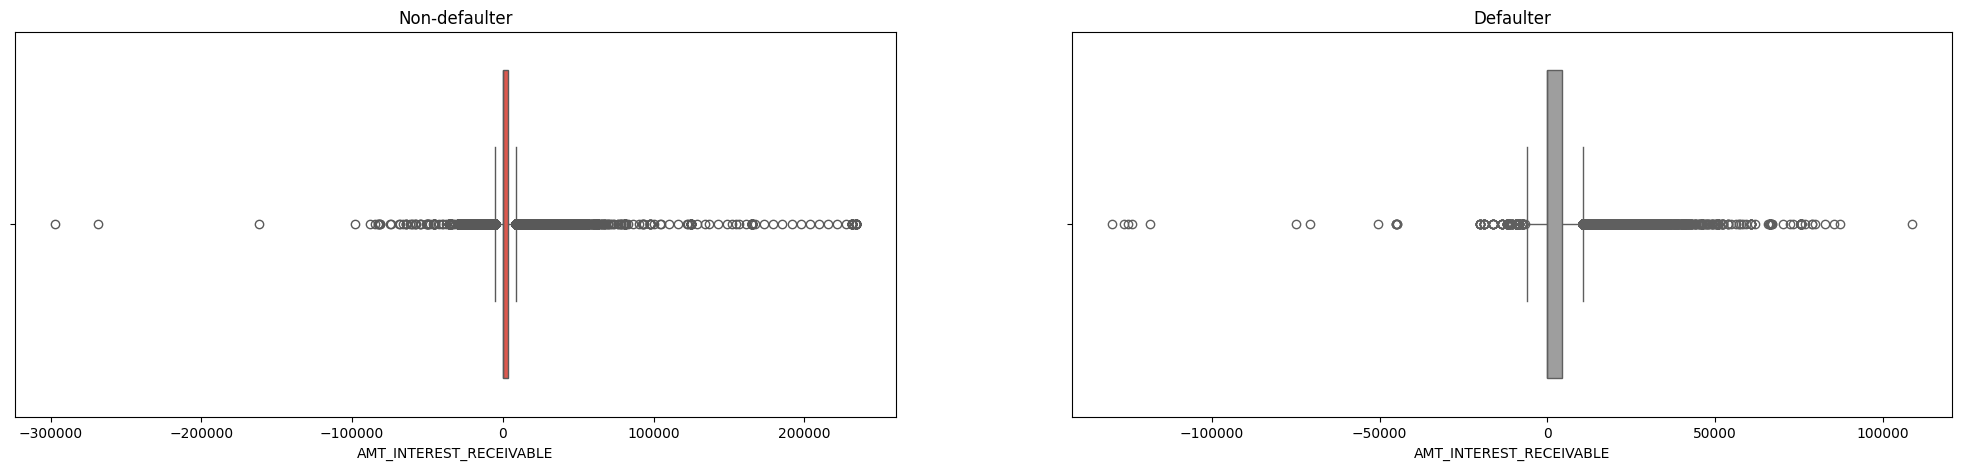

In [21]:
visualize.box_plot2(x='AMT_INTEREST_RECEIVABLE', df1= cc_non_default, df2=cc_default, width= 25, height= 5)

Non-default group (less than - 25000 and greater than 75000) tends to have higher interest rates to pay than the default group.

Credit Purpose index group: "AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_CURRENT", "AMT_DRAWINGS_OTHER_CURRENT", "AMT_DRAWINGS_POS_CURRENT", "CNT_DRAWINGS_ATM_CURRENT", "CNT_DRAWINGS_CURRENT", "CNT_DRAWINGS_OTHER_CURRENT", "CNT_DRAWINGS_POS_CURRENT", "CNT_INSTALMENT_MATURE_CUM"

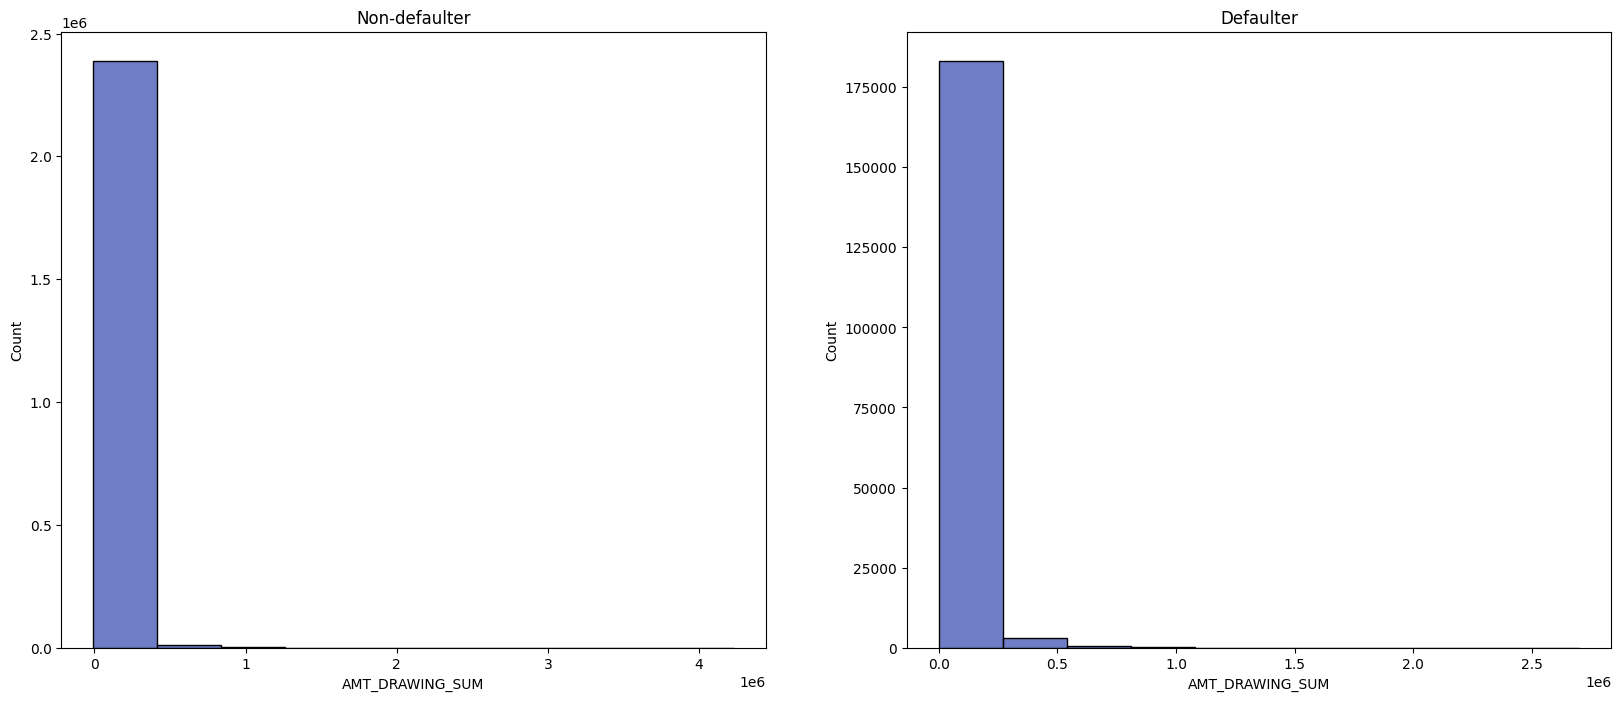

In [22]:
visualize.hist_plot(x='AMT_DRAWING_SUM', df1=cc_non_default, df2=cc_default,width=20, height=8, bins=10)

In both groups, the majority of customers do not exceed 50,000 USD


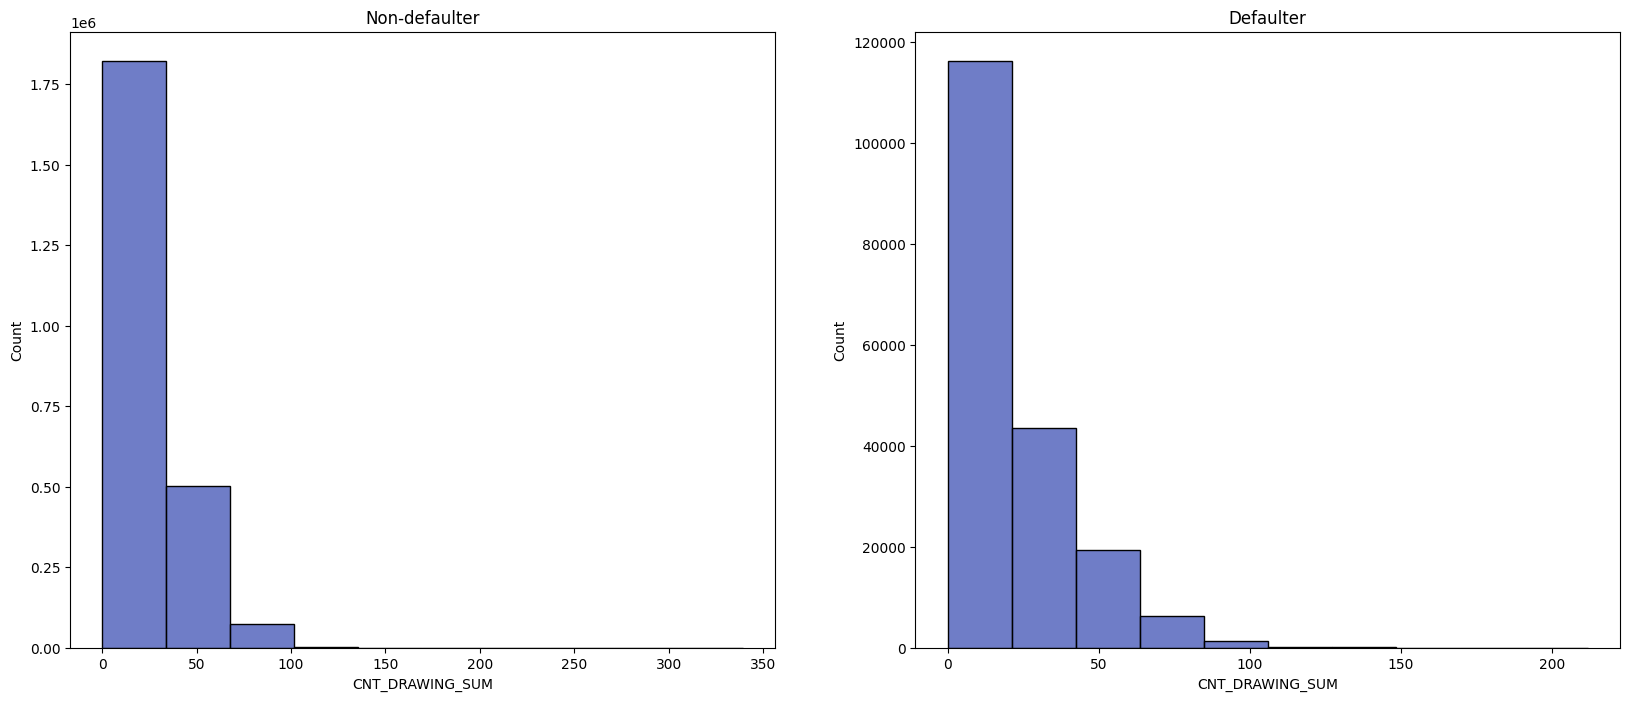

In [23]:
visualize.hist_plot(x='CNT_DRAWING_SUM', df1=cc_non_default, df2=cc_default,width=20, height=8, bins=10)

Both groups have relatively equal frequencies of withdrawing money and using credit

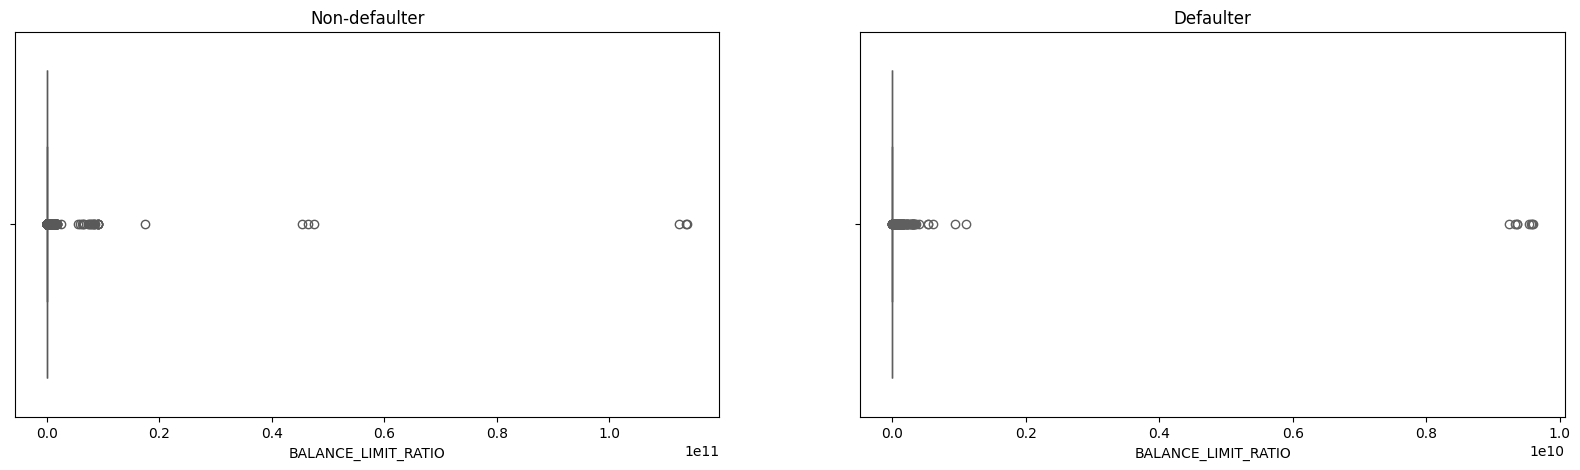

In [24]:
# Phần trăm hạn mức đã sử dụng:
visualize.box_plot2(x='BALANCE_LIMIT_RATIO', df1=cc_non_default, df2=cc_default, width=20, height=5)

In [25]:
n = len(cc_non_default[cc_non_default['BALANCE_LIMIT_RATIO'] <= 0.2])
print(n / len(cc_non_default))

0.6253415983469973


In [26]:
n = len(cc_default[cc_default['BALANCE_LIMIT_RATIO'] <= 0.2])
print(n / len(cc_default))

0.5516542623722144


The majority of users do not exceed 20% of their credit limit (~62% for the non-default group and ~55% for the default group)